In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Acer\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [2]:
data = pd.read_csv("cardio.csv")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Text(0, 0.5, 'Frequency')

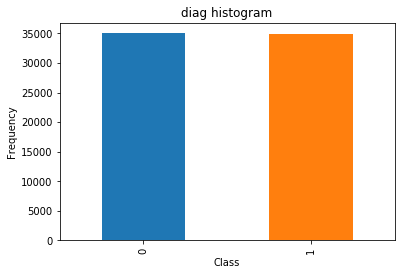

In [3]:
count_classes = pd.value_counts(data['cardio'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("diag histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

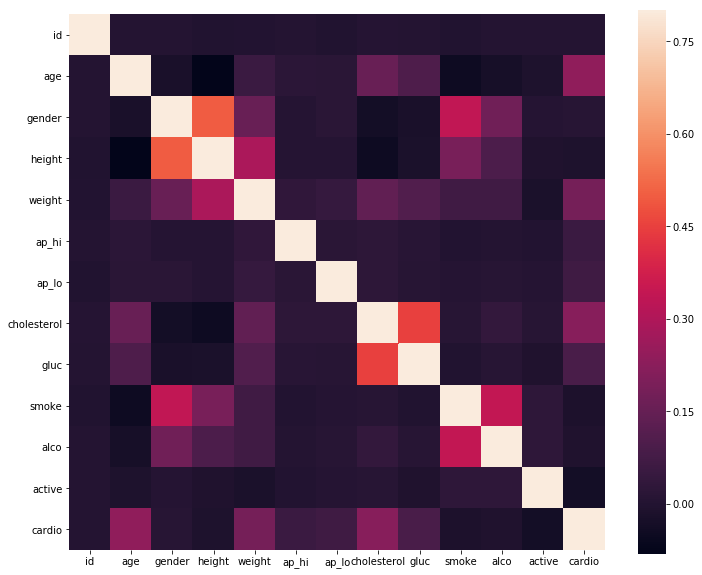

In [4]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
class Autoencoder(object):

    def __init__(self, n_hidden_1, n_hidden_2, n_input, learning_rate):
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_input = n_input

        self.learning_rate = learning_rate

        self.weights, self.biases = self._initialize_weights()

        self.x = tf.placeholder("float", [None, self.n_input])

        self.encoder_op = self.encoder(self.x)
        self.decoder_op = self.decoder(self.encoder_op)

        self.cost = tf.reduce_mean(tf.pow(self.x - self.decoder_op, 2))
        self.optimizer = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.cost)

        init = tf.initialize_all_variables()
        self.sess = tf.Session()
        self.sess.run(init)

    def _initialize_weights(self):
      
        weights = {
            'encoder_h1': tf.Variable(tf.random_normal([self.n_input, self.n_hidden_1])),
            'encoder_h2': tf.Variable(tf.random_normal([self.n_hidden_1, self.n_hidden_2])),
            'decoder_h1': tf.Variable(tf.random_normal([self.n_hidden_2, self.n_hidden_1])),
            'decoder_h2': tf.Variable(tf.random_normal([self.n_hidden_1, self.n_input])),
        }
        biases = {
            'encoder_b1': tf.Variable(tf.random_normal([self.n_hidden_1])),
            'encoder_b2': tf.Variable(tf.random_normal([self.n_hidden_2])),
            'decoder_b1': tf.Variable(tf.random_normal([self.n_hidden_1])),
            'decoder_b2': tf.Variable(tf.random_normal([self.n_input])),
        }

        return weights, biases

    def encoder(self, X):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, self.weights['encoder_h1']),
                                       self.biases['encoder_b1']))
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.weights['encoder_h2']),
                                       self.biases['encoder_b2']))
        return layer_2

    def decoder(self, X):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, self.weights['decoder_h1']),
                                       self.biases['decoder_b1']))
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.weights['decoder_h2']),
                                       self.biases['decoder_b2']))
        return layer_2

    def calc_total_cost(self, X):
        return self.sess.run(self.cost, feed_dict={self.x: X})

    def partial_fit(self, X):
        cost, opt = self.sess.run((self.cost, self.optimizer), feed_dict={self.x: X})
        return cost

    def transform(self, X):
        return self.sess.run(self.encoder_op, feed_dict={self.x: X})

    def reconstruct(self, X):
        return self.sess.run(self.decoder_op, feed_dict={self.x: X})

In [126]:
from sklearn.model_selection import train_test_split

In [128]:
bad_data = data[data['cardio'] == 1]
good_data = data[data['cardio'] == 0]
#print 'bad: {}, good: {}'.format(len(bad_data), len(good_data))

In [129]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

X_train = X_train[X_train['cardio']==1]
X_train = X_train.drop(['cardio'], axis=1)

y_test = X_test['cardio']
X_test = X_test.drop(['cardio'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [130]:
X_good = good_data.ix[:, good_data.columns != 'cardio']
y_good = good_data.ix[:, good_data.columns == 'cardio']

X_bad = bad_data.ix[:, bad_data.columns != 'cardio']
y_bad = bad_data.ix[:, bad_data.columns == 'cardio']

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Acer\Anaconda3\lib\

In [131]:
model = Autoencoder(n_hidden_1=15, n_hidden_2=3, n_input=X_train.shape[1], learning_rate = 0.01)

In [132]:
training_epochs = 100
batch_size = 256
display_step = 100
record_step = 10

In [133]:
total_batch = int(X_train.shape[0]/batch_size)

cost_summary = []

for epoch in range(training_epochs):
    cost = None
    for i in range(total_batch):
        batch_start = i * batch_size
        batch_end = (i + 1) * batch_size
        batch = X_train[batch_start:batch_end, :]
        
        cost = model.partial_fit(batch)
    
    if epoch % display_step == 0 or epoch % record_step == 0:
        total_cost = model.calc_total_cost(X_train)
        
        if epoch % record_step == 0:
            cost_summary.append({'epoch': epoch+1, 'cost': total_cost})
        
        if epoch % display_step == 0:
            print("Epoch:{}, cost={:.9f}".format(epoch+1, total_cost))

Epoch:1, cost=311373632.000000000


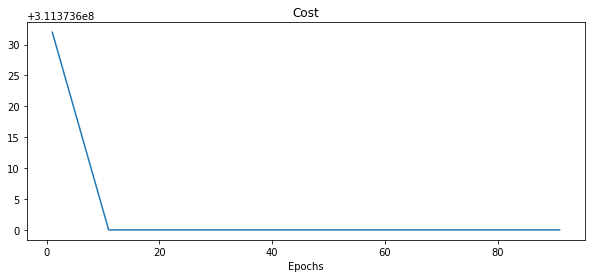

In [134]:
f, ax1 = plt.subplots(1, 1, figsize=(10,4))

ax1.plot(list(map(lambda x: x['epoch'], cost_summary)), list(map(lambda x: x['cost'], cost_summary)))
ax1.set_title('Cost')

plt.xlabel('Epochs')
plt.show()

In [135]:
encode_decode = None
total_batch = int(X_test.shape[0]/batch_size) + 1
for i in range(total_batch):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch = X_test[batch_start:batch_end, :]
    batch_res = model.reconstruct(batch)
    if encode_decode is None:
        encode_decode = batch_res
    else:
        encode_decode = np.vstack((encode_decode, batch_res))

In [136]:
def get_df(orig, ed, _y):
    rmse = np.mean(np.power(orig - ed, 2), axis=1)
    return pd.DataFrame({'rmse': rmse, 'target': _y})

In [137]:
df = get_df(X_test, encode_decode, y_test)

In [138]:
df.describe()

,rmse,target
count,1.400000e+04,14000.000000
mean,3.091616e+08,0.500857
std,2.469482e+08,0.500017
min,1.733371e+07,0.000000
25%,8.497549e+07,0.000000
50%,2.418083e+08,1.000000
75%,4.950922e+08,1.000000
max,8.747739e+08,1.000000


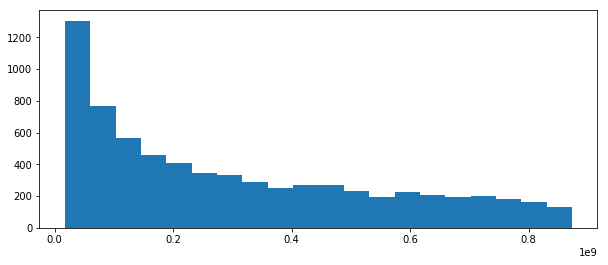

In [139]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[df['target']== 0].rmse.values, bins=20)

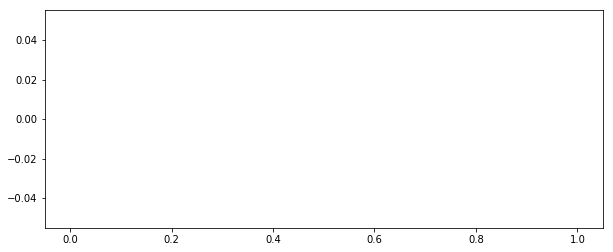

In [140]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[(df['target']== 0) & (df['rmse'] < 10)].rmse.values, bins=20)

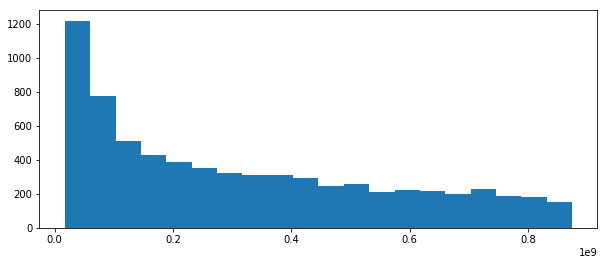

In [141]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[df['target'] > 0].rmse.values, bins=20)

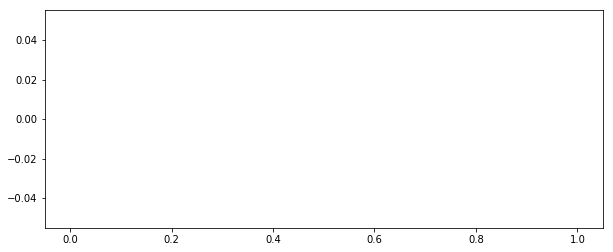

In [142]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[(df['target'] > 0) & (df['rmse'] < 10)].rmse.values, bins=20)

In [143]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_auc_score, 
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [144]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

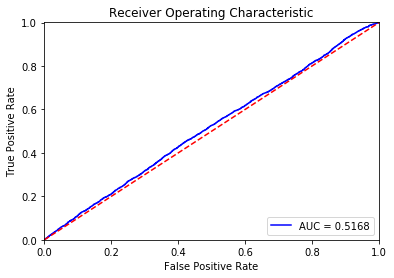

In [145]:
fpr, tpr, thresholds = roc_curve(df.target, df.rmse)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

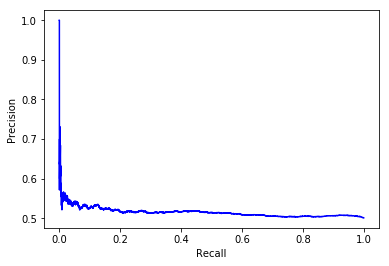

In [146]:
precision, recall, th = precision_recall_curve(df.target, df.rmse)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

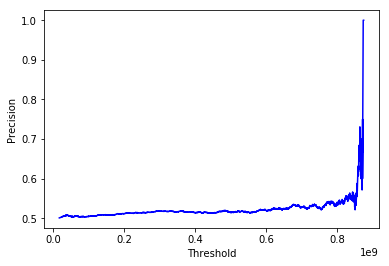

In [147]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Recall metric in the testing dataset:  1.0


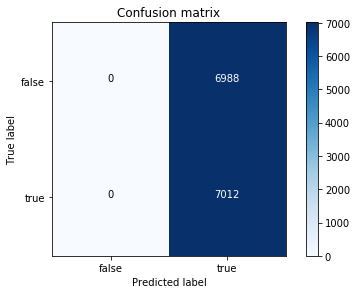

In [148]:
y_pred = [1 if p > 2 else 0 for p in df.rmse.values]
cnf_matrix = confusion_matrix(df.target, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = ['false','true']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [149]:
f1_score(y_pred=y_pred, y_true = df.target)

0.667428136303065

In [150]:
precision_recall_fscore_support(y_pred=y_pred, y_true=df.target)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0. , 0.5]),
 array([0., 1.]),
 array([0.  , 0.67]),
 array([6988, 7012], dtype=int64))

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(df.target, y_pred)

0.5008571428571429

In [152]:
from sklearn.metrics import precision_score

In [153]:
precision_score(df.target, y_pred)

0.5008571428571429

In [154]:
from sklearn.metrics import recall_score
recall_score(df.target, y_pred)

1.0

In [ ]:
#PREPROCESSED DATASET

In [155]:
import numpy as np 
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
data = pd.read_csv("cardiopca.csv")
data.head()

,Unnamed: 0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,0,-0.521293,-1.089381,0.184751,-0.089522,-0.565476,0.288893,0.002810,-1.132016,-0.535095,-0.164727,0
1,1,0.912458,1.726798,-0.253653,0.190462,-0.405668,0.246011,-0.005842,0.818800,0.638495,-1.814626,0
2,2,0.803694,1.114356,0.195120,-0.832354,1.577707,-0.680217,0.758509,-0.412813,-0.019412,-2.096095,0
3,3,-1.044805,-0.805892,0.838345,0.125422,-0.648306,0.410102,0.352831,-0.150953,-0.187384,-0.061978,0
4,4,1.547280,-1.080408,-0.199603,-0.764887,1.710823,-0.873526,0.769984,-0.340312,0.027443,-0.049788,0


Text(0, 0.5, 'Frequency')

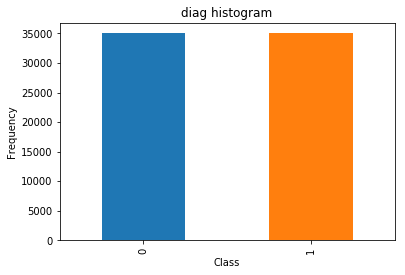

In [157]:
count_classes = pd.value_counts(data['target'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("diag histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
class Autoencoder(object):

    def __init__(self, n_hidden_1, n_hidden_2, n_input, learning_rate):
        self.n_hidden_1 = n_hidden_1
        self.n_hidden_2 = n_hidden_2
        self.n_input = n_input

        self.learning_rate = learning_rate

        self.weights, self.biases = self._initialize_weights()

        self.x = tf.placeholder("float", [None, self.n_input])

        self.encoder_op = self.encoder(self.x)
        self.decoder_op = self.decoder(self.encoder_op)

        self.cost = tf.reduce_mean(tf.pow(self.x - self.decoder_op, 2))
        self.optimizer = tf.train.RMSPropOptimizer(self.learning_rate).minimize(self.cost)

        init = tf.initialize_all_variables()
        self.sess = tf.Session()
        self.sess.run(init)

    def _initialize_weights(self):
      
        weights = {
            'encoder_h1': tf.Variable(tf.random_normal([self.n_input, self.n_hidden_1])),
            'encoder_h2': tf.Variable(tf.random_normal([self.n_hidden_1, self.n_hidden_2])),
            'decoder_h1': tf.Variable(tf.random_normal([self.n_hidden_2, self.n_hidden_1])),
            'decoder_h2': tf.Variable(tf.random_normal([self.n_hidden_1, self.n_input])),
        }
        biases = {
            'encoder_b1': tf.Variable(tf.random_normal([self.n_hidden_1])),
            'encoder_b2': tf.Variable(tf.random_normal([self.n_hidden_2])),
            'decoder_b1': tf.Variable(tf.random_normal([self.n_hidden_1])),
            'decoder_b2': tf.Variable(tf.random_normal([self.n_input])),
        }

        return weights, biases

    def encoder(self, X):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, self.weights['encoder_h1']),
                                       self.biases['encoder_b1']))
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.weights['encoder_h2']),
                                       self.biases['encoder_b2']))
        return layer_2

    def decoder(self, X):
        layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(X, self.weights['decoder_h1']),
                                       self.biases['decoder_b1']))
        layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, self.weights['decoder_h2']),
                                       self.biases['decoder_b2']))
        return layer_2

    def calc_total_cost(self, X):
        return self.sess.run(self.cost, feed_dict={self.x: X})

    def partial_fit(self, X):
        cost, opt = self.sess.run((self.cost, self.optimizer), feed_dict={self.x: X})
        return cost

    def transform(self, X):
        return self.sess.run(self.encoder_op, feed_dict={self.x: X})

    def reconstruct(self, X):
        return self.sess.run(self.decoder_op, feed_dict={self.x: X})

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
bad_data = data[data['target'] == 1]
good_data = data[data['target'] == 0]

In [162]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

X_train = X_train[X_train['target']==1]
X_train = X_train.drop(['target'], axis=1)

y_test = X_test['target']
X_test = X_test.drop(['target'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [163]:
X_good = good_data.ix[:, good_data.columns != 'target']
y_good = good_data.ix[:, good_data.columns == 'target']

X_bad = bad_data.ix[:, bad_data.columns != 'target']
y_bad = bad_data.ix[:, bad_data.columns == 'target']

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Acer\Anaconda3\lib\

In [164]:
model = Autoencoder(n_hidden_1=15, n_hidden_2=3, n_input=X_train.shape[1], learning_rate = 0.01)

In [165]:
training_epochs = 100
batch_size = 256
display_step = 100
record_step = 10

In [166]:
total_batch = int(X_train.shape[0]/batch_size)

cost_summary = []

for epoch in range(training_epochs):
    cost = None
    for i in range(total_batch):
        batch_start = i * batch_size
        batch_end = (i + 1) * batch_size
        batch = X_train[batch_start:batch_end, :]
        
        cost = model.partial_fit(batch)
    
    if epoch % display_step == 0 or epoch % record_step == 0:
        total_cost = model.calc_total_cost(X_train)
        
        if epoch % record_step == 0:
            cost_summary.append({'epoch': epoch+1, 'cost': total_cost})
        
        if epoch % display_step == 0:
            print("Epoch:{}, cost={:.9f}".format(epoch+1, total_cost))

Epoch:1, cost=260217696.000000000


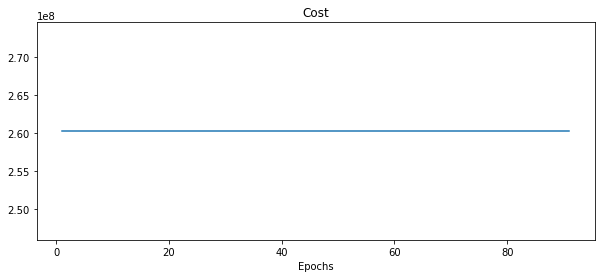

In [167]:
f, ax1 = plt.subplots(1, 1, figsize=(10,4))

ax1.plot(list(map(lambda x: x['epoch'], cost_summary)), list(map(lambda x: x['cost'], cost_summary)))
ax1.set_title('Cost')

plt.xlabel('Epochs')
plt.show()

In [168]:
encode_decode = None
total_batch = int(X_test.shape[0]/batch_size) + 1
for i in range(total_batch):
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size
    batch = X_test[batch_start:batch_end, :]
    batch_res = model.reconstruct(batch)
    if encode_decode is None:
        encode_decode = batch_res
    else:
        encode_decode = np.vstack((encode_decode, batch_res))

In [169]:
def get_df(orig, ed, _y):
    rmse = np.mean(np.power(orig - ed, 2), axis=1)
    return pd.DataFrame({'rmse': rmse, 'target': _y})

In [170]:
df = get_df(X_test, encode_decode, y_test)

In [171]:
df.describe()

,rmse,target
count,1.400000e+04,14000.000000
mean,1.482368e+08,0.502214
std,1.320661e+08,0.500013
min,1.598558e+00,0.000000
25%,2.800900e+07,0.000000
50%,1.122499e+08,1.000000
75%,2.485130e+08,1.000000
max,4.453782e+08,1.000000


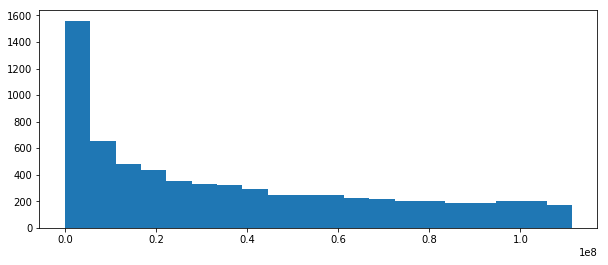

In [172]:
fig= plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[df['target']== 0].rmse.values, bins=20)

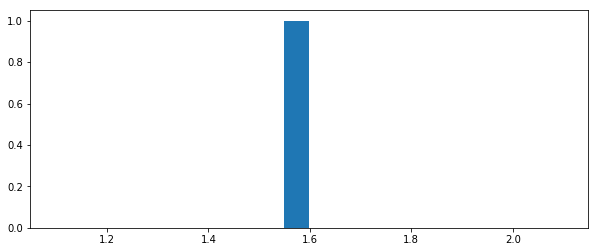

In [173]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[(df['target']== 0) & (df['rmse'] < 10)].rmse.values, bins=20)

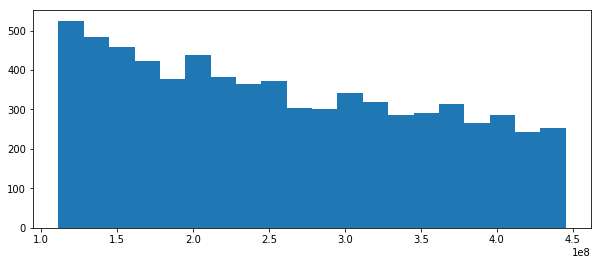

In [174]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[df['target'] > 0].rmse.values, bins=20)

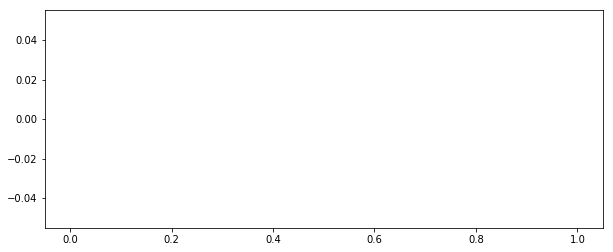

In [175]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
_ = ax.hist(df[(df['target'] > 0) & (df['rmse'] < 10)].rmse.values, bins=20)

In [176]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_auc_score, 
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [179]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        1

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

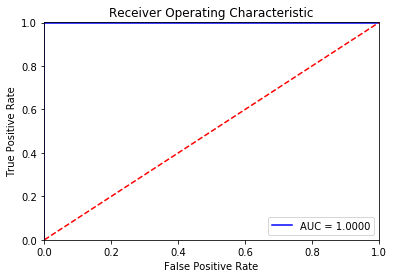

In [180]:
fpr, tpr, thresholds = roc_curve(df.target, df.rmse)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

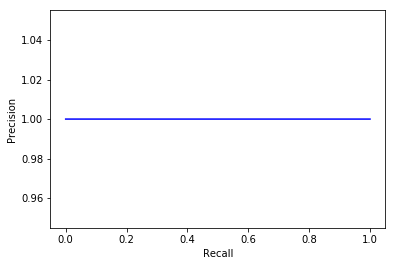

In [181]:
precision, recall, th = precision_recall_curve(df.target, df.rmse)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

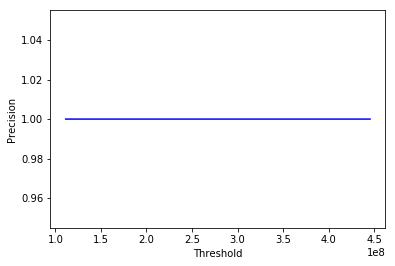

In [182]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Recall metric in the testing dataset:  1.0


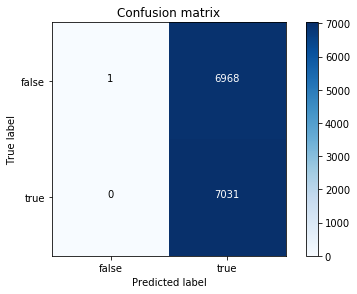

In [183]:
y_pred = [1 if p > 2 else 0 for p in df.rmse.values]
cnf_matrix = confusion_matrix(df.target, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = ['false','true']
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [184]:
f1_score(y_pred=y_pred, y_true = df.target)

0.6686638135996196

In [185]:
precision_recall_fscore_support(y_pred=y_pred, y_true=df.target)

(array([1. , 0.5]),
 array([1.43e-04, 1.00e+00]),
 array([2.87e-04, 6.69e-01]),
 array([6969, 7031], dtype=int64))

In [186]:
from sklearn.metrics import accuracy_score

In [187]:
accuracy_score(df.target, y_pred)

0.5022857142857143

In [188]:
from sklearn.metrics import precision_score

In [189]:
precision_score(df.target, y_pred)

0.5022501607257661

In [190]:
from sklearn.metrics import recall_score

In [191]:
recall_score(df.target, y_pred)

1.0